In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
P = 22002.18
APR = .02
m = 12
r = APR/m
c = 1500

def balance(principal, contribution, rate, noPeriods):
    return principal*(1+rate)**noPeriods + contribution*((1+rate)**(noPeriods + 1) - (1+rate))/rate

In [4]:
balance(P, c, r, 12)

40642.476473762305

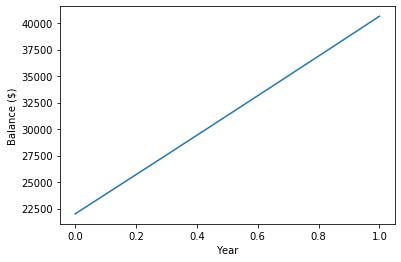

In [17]:
noYears = 1
x = np.linspace(0,noYears)
plt.plot(x,balance(P, c, r, x*12))
plt.xlabel("Year")
plt.ylabel("Balance ($)")
plt.show()

In [10]:
class account:
    numberOfAccounts = 0
    
    acctTypes = ('savings','investment')
    
    def __init__(self, accountType, principal, APR, contribution, contributionFreq):
        if accountType not in self.acctTypes:
            raise ValueError("%s is not a valid account type." % accountType)
        self.accountType = accountType
        self.principal = principal
        self.APR = APR
        self.contribution = contribution
        self.contributionFreq = contributionFreq
        
        type(self).numberOfAccounts += 1
    
    def __del__(self):
        type(self).numberOfAccounts -= 1

In [11]:
test = account("checking", 0, 0, 500, 'weekly')

ValueError: checking is not a valid account type.

In [7]:
CapOne = account("savings", 20000, 2, 1500, "monthly")
Betterment = account("invest", 10000, 4, 500, "biweekly")
account.numberOfAccounts

2

In [8]:
del Betterment

In [9]:
account.numberOfAccounts

1